# Regressão linear para prever as despesas médicas de um paciente 
![Machine learning](imagens/health.png) 

## Lendo dados utilizando pandas

**Pandas:** Biblioteca do python para exploracação, manipulação e análise de dados
- [Instruções de instalação](http://pandas.pydata.org/pandas-docs/stable/install.html)


In [28]:
#Jeito convencional de importar a biblioteca pandas
import pandas as pd

In [29]:
#Lendo o arquivo .csv e armazenando no objeto data
data = pd.read_csv('insurance.csv')

In [30]:
#Visualizando as 5 primeiras linhas do dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
# Visualizando as 5 últimas linhas do dataset
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [32]:
#Conferindo o formato do dataframe (linhas,colunas)
data.shape

(1338, 7)

Quais são os atributos?
- **age:** idade do paciente
- **sex:** sexo do paciente
- **bmi:** imc do paciente
- **children:** quantidade de filhos do paciente
- **smoker:** se é fumante ou não
- **region:** região do paciente


Qual a resposta de saída?
- **charges:** custos médicos do paciente (em dólares)

O que mais sabemos?
- Como a resposta de saída é contínua, temos um problema de regressão.
- Temos 1338 **amostras** (representadas pelas linhas), e cada amostra representa um paciente.

## Visualização de dados utilizando seaborn
**Seaborn:** Biblioteca para visualização de dados estatísticos
- [Instruções de instalação](http://seaborn.pydata.org/installing.html)

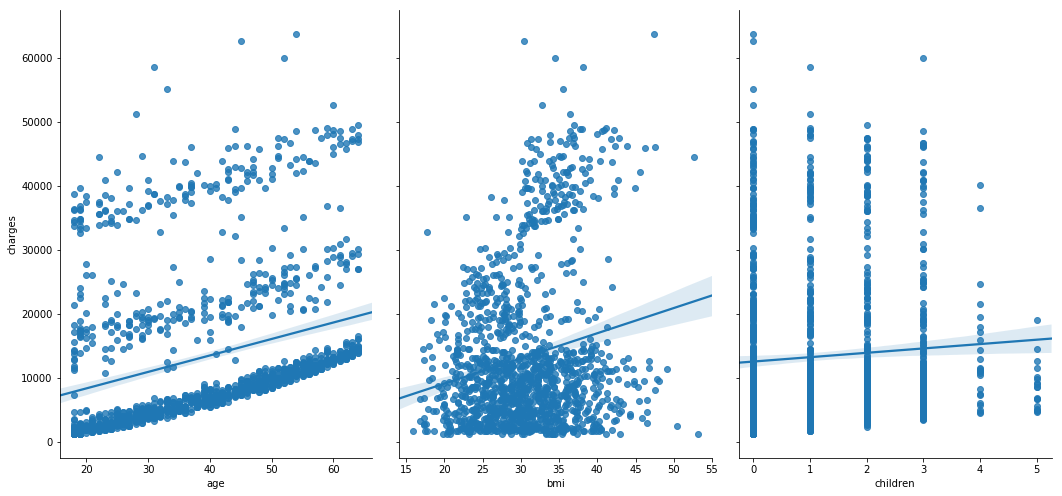

In [36]:
# Visualizando a relação entre atributos e a variável de reposta com gráficos de dispersão
import seaborn as sns
sns.pairplot(data, x_vars=['age', 'bmi', 'children'], 
             y_vars = 'charges', size=7, aspect=0.7, kind='reg')

## Tipos de aprendizado supervisionado

- **Classificação:** Prediz uma reposta categórica.
- **Regressão:** Prediz uma resposta contínua.

## Regressão linear

**Forma da regressão linear:** $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ é a saída
- $\beta_0$ é a interseção com o eixo y
- $\beta_1$ é o coeficiente de $x_1$ (o primeiro atributo)
- $\beta_n$ é o coeficiente de $x_n$ (atributo n)

Nesse caso:

$y = \beta_0 + \beta_1 \times age + \beta_2 \times sex + \beta_3 \times bmi + \beta_4 \times children + \beta_5 \times smoker + \beta_6 \times region$

Os valores de $\beta$ são chamados de **coeficientes do modelo**. Esse valores são aprendidos durante o passo de ajuste do modelo utilizando o critério dos mínimos quadrados. Então o modelo ajustado pode ser utilizado para fazer predições.


 ### Criando a matriz de atributos
 - scikit-learn espeera que X (matriz de atributos) e y (vetor de resposta) sejam passados como Numpy arrays.

In [38]:
#Criando uma lista com os nomes dos atributos
feature_cols = ['age','sex','bmi','children','smoker','region']

In [39]:
#Utilizando a lista para selecionar um subconjunto do dataframe original
X = data[feature_cols]

In [41]:
#Comando equivalente com apenas uma linha
X = data[['age','sex','bmi','children','smoker','region']]

In [45]:
#Visualizando as 5 primeiras linhas da matriz de atributos
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [49]:
#Entendendo o atributo columns
data.columns[0:6]

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [57]:
#Outra forma de selecionar os nomes dos atributos
feature_cols = data.columns[0:6]
X = data[feature_cols]
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [51]:
#Checando o tipo e formato de X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1338, 6)


### Substituindo as palavras por números no dataset


In [55]:
#importando a biblioteca numpy
import numpy as np

#(smoker): no -> 0 / yes -> 1
data.smoker = np.where(data.smoker=='no', 0, data.smoker)
data.smoker = np.where(data.smoker=='yes', 1, data.smoker)

#(sex): female -> 0 / male -> 1
data.sex = np.where(data.sex=='female', 0, data.sex)
data.sex = np.where(data.sex=='male', 1, data.sex)

#(region): southwest -> 0 / northwest -> 1
data.region = np.where(data.region=='southwest', 0, data.region)
data.region = np.where(data.region=='northwest', 1, data.region)
data.region = np.where(data.region=='southeast', 2, data.region)
data.region = np.where(data.region=='northeast', 3, data.region)

In [56]:
#Checando as alterações no dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [54]:
data.region.value_counts()

southeast    364
1            325
0            325
northeast    324
Name: region, dtype: int64

### Criando o vetor de saída

In [58]:
#Selecionado uma série do dataframe
y = data['charges']

In [59]:
#Comando equivalente
y = data.charges

In [60]:
#Visualizando os 5 primeiros valores
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [61]:
#Checando o formato de y
print(y.shape)

(1338,)


### Separando o conjunto de treino e conjunto de teste

In [62]:
# Separando o conjunto de dados entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [63]:
# A divisão padrão (default) é 75% para treino e 25% para teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 6)
(335, 6)
(1003,)
(335,)


In [64]:
#Conferindo a continha de padaria
0.25*1338

334.5

### Construindo o modelo de regressão linear

In [65]:
#Importando o modelo
from sklearn.linear_model import LinearRegression

In [66]:
#Instanciando o estimador
linreg = LinearRegression()

In [67]:
#Ajustando o modelo ao conjunto de treino
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Interpretando os coeficientes do modelo

In [68]:
#Visualizando a interseção e os coeficientes 
print(linreg.intercept_)
print(linreg.coef_)

-11455.097480819495
[  252.41384831  -264.97499113   309.02374088   366.30698195
 24058.71610695   133.37892524]


In [69]:
#Atributos e seus coeficientes
list(zip(feature_cols, linreg.coef_))

[('age', 252.41384830796804),
 ('sex', -264.9749911349622),
 ('bmi', 309.0237408784386),
 ('children', 366.30698194919574),
 ('smoker', 24058.71610695464),
 ('region', 133.37892523653684)]

$y = -11455.09 + 252.4 \times age + -264.9 \times sex + 309 \times bmi + 366.3 \times children + 24058.7 \times smoker + 133.3 \times region$

Como interpretar o coeficiente de age (252.4)?

### Fazendo predições

In [71]:
#Fazendo predições no conjunto de teste
y_pred = linreg.predict(X_test)

 Nós precisamos de uma **métrica de avaliação** para comparar nossas predições com os valores verdadeiros!

## Métricas de avaliação para regressão

In [72]:
# Definindo os valores de resposta verdadeiros e preditos
true = [100,50,30,30]
pred = [90,50,50,30]

**Mean Absolute Error** (MAE) é a média do valor absoluto dos erros: 

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [77]:
# Calculando erro médio absoluto na mão
print((10+0+20+0)/4)

# Calculando erro médio absoluto utilizando scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

7.5
7.5


**Mean Squared Error** (MSE) é a média dos erros ao quadráticos:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [79]:
#Calculando MSE na mão
print((10**2+0+20**2+0)/4)

# Calculando MSE utilizando scikit-learn
print(metrics.mean_squared_error(true,pred))

125.0
125.0


**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros quadráticos: 

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [80]:
# Calculando RMSE na mão
print(np.sqrt((10**2+0+20**2+0)/4))

# Calculando RMSE utilizando scikit-learn
print(np.sqrt(metrics.mean_squared_error(true,pred)))

11.180339887498949
11.180339887498949


Comparando essas métricas:

- **MAE** é a mais fácil de enenteder.
- **MSE** é mais popular que MAE, porque MSE "pune" erros grandes.
- **RMSE** é ainda mais popular que MSE, porque RMSE é interpretável na mesma unidade de y.

### Calculando RMSE para nossas predições de custos médicos


In [81]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5999.138398042529


In [82]:
#Como interpretar esse valor?
print(max(data.charges))
print(min(data.charges))

63770.42801
1121.8739


## Seleção de atributos

In [83]:
# Criando uma lista com os nomes dos atributos
feature_cols = ['age','sex','bmi','children','smoker']

# Usando a lista para escolher um subconjunto do dataframe original
X = data[feature_cols]

# Selecionando a Série no dataframe
y = data.charges

# Dividindo entre conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Ajsutando o modelo (Aprendendo os coeficientes)
linreg.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
y_pred = linreg.predict(X_test)

# Calculando RMSE para nossas predições
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

6009.798666772751


## Comentários ou dúvidas?

- Email: <suporte@viniciusgalvaoia.com.br>
- Website: http://viniciusgalvaoia.com.br

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()